In [44]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Canny Edge Detection

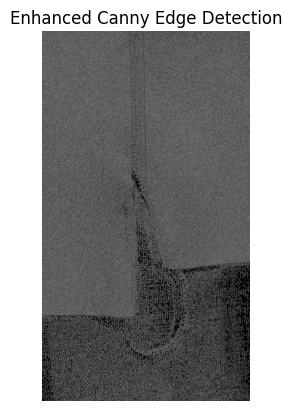

In [72]:
# Read the image
image = cv2.imread('../Component 01/Dataset/2024_04_02_11_31_IMG_8830.JPG', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to the image
equalized_image = cv2.equalizeHist(image)

# Apply Canny edge detection with adjusted thresholds
edges = cv2.Canny(equalized_image, 40, 15)

# Display the output
plt.imshow(edges, cmap='gray')
plt.title('Enhanced Canny Edge Detection')
plt.axis('off')
plt.show()

### Sobel Operator

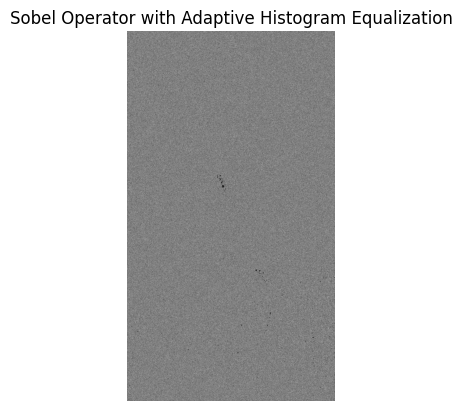

In [73]:
# Load the image
image = cv2.imread('../Component 01/Dataset/2024_04_02_11_31_IMG_8830.JPG', cv2.IMREAD_GRAYSCALE)

# Apply adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_image = clahe.apply(image)

# Apply Sobel operator
sobelx = cv2.Sobel(enhanced_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(enhanced_image, cv2.CV_64F, 0, 1, ksize=5)
edges_sobel = np.sqrt(sobelx**2 + sobely**2).astype(np.uint8)

# Display the output
plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Operator with Adaptive Histogram Equalization')
plt.axis('off')
plt.show()

### Scharr Operator

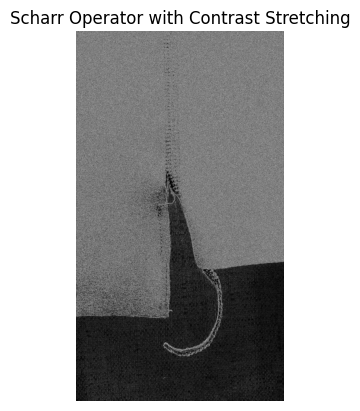

In [74]:
# Load the image
image = cv2.imread('../Component 01/Dataset/2024_04_02_11_31_IMG_8830.JPG', cv2.IMREAD_GRAYSCALE)

# Apply contrast stretching
normalized_image = cv2.normalize(image, None, alpha=80, beta=175, norm_type=cv2.NORM_MINMAX)
contrast_stretched_image = cv2.convertScaleAbs(normalized_image)

# Apply Scharr operator
scharrx = cv2.Scharr(contrast_stretched_image, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(contrast_stretched_image, cv2.CV_64F, 0, 1)
edges_scharr = np.sqrt(scharrx**2 + scharry**2).astype(np.uint8)

# Display the output
plt.imshow(edges_scharr, cmap='gray')
plt.title('Scharr Operator with Contrast Stretching')
plt.axis('off')
plt.show()

### Gradient Magnitude Thresholding

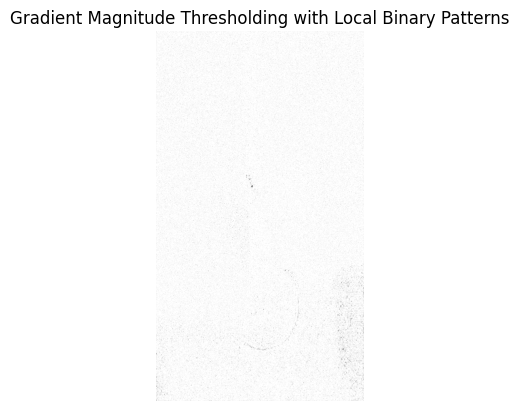

In [75]:
from skimage.feature import local_binary_pattern

# Load the image
image_path = '../Component 01/Dataset/2024_04_02_11_31_IMG_8830.JPG'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Compute Local Binary Patterns (LBPs)
radius = 3
num_points = 8 * radius
lbp_image = local_binary_pattern(image, num_points, radius, method='uniform')

# Convert LBPs to uint8 datatype
lbp_image = lbp_image.astype(np.uint8)

# Apply gradient magnitude thresholding
sobelx = cv2.Sobel(lbp_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(lbp_image, cv2.CV_64F, 0, 1, ksize=5)
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
_, edges_gradient_threshold = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)

# Display the output
plt.imshow(edges_gradient_threshold, cmap='gray')
plt.title('Gradient Magnitude Thresholding with Local Binary Patterns')
plt.axis('off')
plt.show()

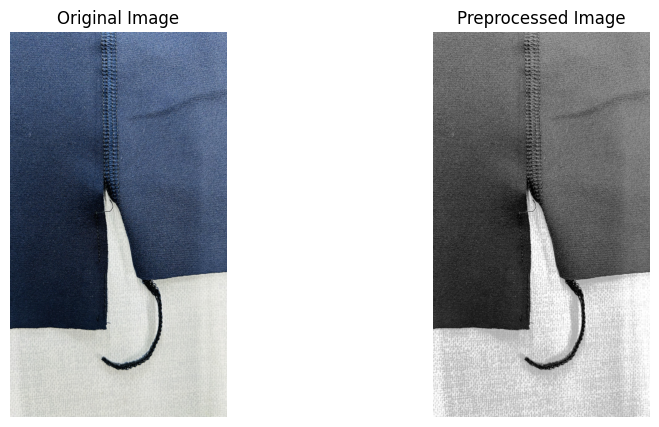

In [87]:
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization to enhance contrast
    equalized = cv2.equalizeHist(gray)
    
    # Apply Gaussian blur for noise reduction
    blurred = cv2.GaussianBlur(equalized, (5, 5), 0)
    
    return blurred

# Read the input image
image_path = "../Component 01/Dataset/2024_04_02_11_31_IMG_8830.JPG"
image = cv2.imread(image_path)

# Preprocess the image
preprocessed_image = preprocess_image(image)

# Display the original and preprocessed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')

plt.show()


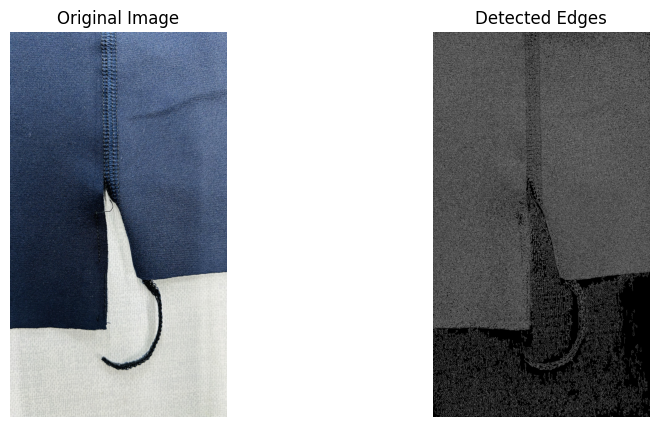

In [96]:
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization to enhance contrast
    equalized = cv2.equalizeHist(gray)
    
    # Apply Gaussian blur for noise reduction
    blurred = cv2.GaussianBlur(equalized, (5, 5), 0)
    
    return blurred

def detect_edges(image):
    # Perform Canny edge detection
    edges = cv2.Canny(image, 100, 10)
    
    return edges

# Read the input image
image_path = "../Component 01/Dataset/2024_04_02_11_31_IMG_8830.JPG"
image = cv2.imread(image_path)

# Preprocess the image
preprocessed_image = preprocess_image(image)

# Detect edges
edges = detect_edges(preprocessed_image)

# Display the original image and the detected edges
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges')
plt.axis('off')

plt.show()
